In [10]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
dfs = []
# loop over the list of csv files
for f in csv_files:
    # filename = f.split("\\")[-1]
    # year = re.findall(r"\d+", filename)[-1]
    # if year in ['2015','2016','2017','2018', '2019', '2020']:
    # read the csv file
    df = pd.read_csv(f)
    dfs.append(df)

In [12]:
# concatenate all data
df = dfs[0].merge(dfs[1], left_on=['state', 'year'], right_on=['state', 'year'])
for i in range(2, 7):
    df = df.merge(dfs[i], left_on=['state', 'year'], right_on=['state', 'year'])

In [13]:
df.shape

(500, 14)

In [14]:
df.head()

,state,legality,year,ab_rate,education,labour_force_participation,mngmt_job_wage_gap,"over 25 years \bach degree ,wage gap,k",life_exp_m_f,sex_ratio,proportion of women,Position_Governor,Position_Lt. Governor,rape_rate
0,Alaska,1,2011,11.20,0.908187,0.837,0.736,17.5,0.941,106.6,0.233,0.0,0.0,60.2
1,Alabama,0,2011,9.90,1.091045,0.780,0.633,25.2,0.929,93.8,0.136,0.0,1.0,28.5
2,Arkansas,0,2011,7.10,1.007538,0.815,0.705,17.5,0.931,97.2,0.222,0.0,0.0,41.9
3,Arizona,1,2011,11.30,0.994282,0.762,0.715,19.4,0.942,99.2,0.344,1.0,0.0,38.6
4,California,1,2011,22.99,1.008387,0.745,0.725,19.3,0.946,99.0,0.283,0.0,0.0,20.3


In [17]:
df.columns

Index(['state', 'legality', 'year', 'ab_rate', 'education',
       'labour_force_participation', 'mngmt_job_wage_gap',
       'over 25 years \bach degree ,wage gap,k', 'life_exp_m_f', 'sex_ratio',
       'proportion of women', 'Position_Governor', 'Position_Lt. Governor',
       'rape_rate'],
      dtype='object')

In [18]:
df = df.rename(columns={"proportion of women": "state_legislature",
                   "Position_Governor": "governor",
                   "Position_Lt. Governor": "lt_governor",
                   r"over 25 years \bach degree ,wage gap,k": "bachelor_wage_gap",
                   'legal?': "ab_legality",
                   'sex_ratio': "sex_ratio_birth"})


In [19]:
# convert male/female to f/m
df['life_exp_f_m'] = 1 / df['life_exp_m_f'] 
df['sex_ratio_birth'] = 1 / (df['sex_ratio_birth'] / 100)
df = df.drop(['life_exp_m_f'], axis=1)

In [20]:
# convert to female - male
df['bachelor_wage_gap'] = -df['bachelor_wage_gap']

In [21]:
df.columns

Index(['state', 'legality', 'year', 'ab_rate', 'education',
       'labour_force_participation', 'mngmt_job_wage_gap', 'bachelor_wage_gap',
       'sex_ratio_birth', 'state_legislature', 'governor', 'lt_governor',
       'rape_rate', 'life_exp_f_m'],
      dtype='object')

In [22]:
# combine governor and lt_governor as state_gov
df['state_gov'] = np.where((df['governor'] == 1) | (df['lt_governor'] == 1), 1, 0)
df = df.drop(['governor','lt_governor'], axis=1)

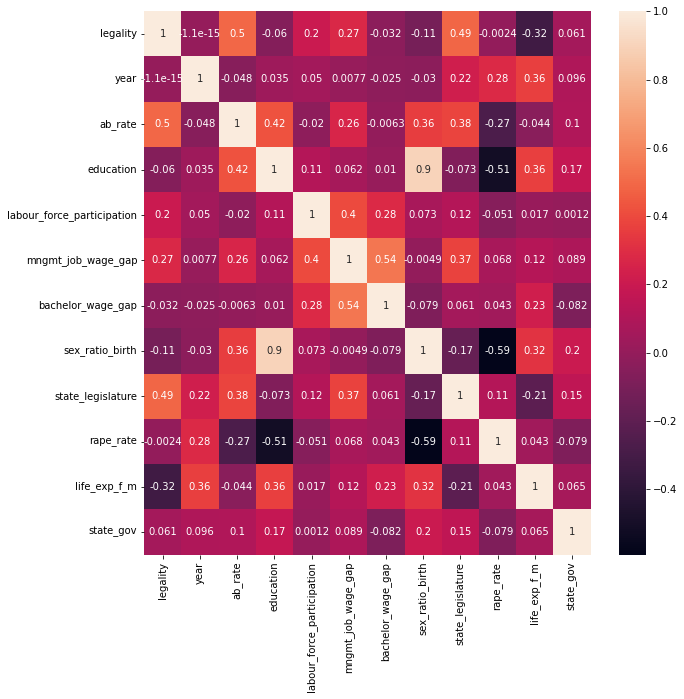

In [23]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

In [24]:
# drop sex_ratio_birth and mngt_job_wage_gap
df = df.drop(['sex_ratio_birth','mngmt_job_wage_gap'], axis=1)

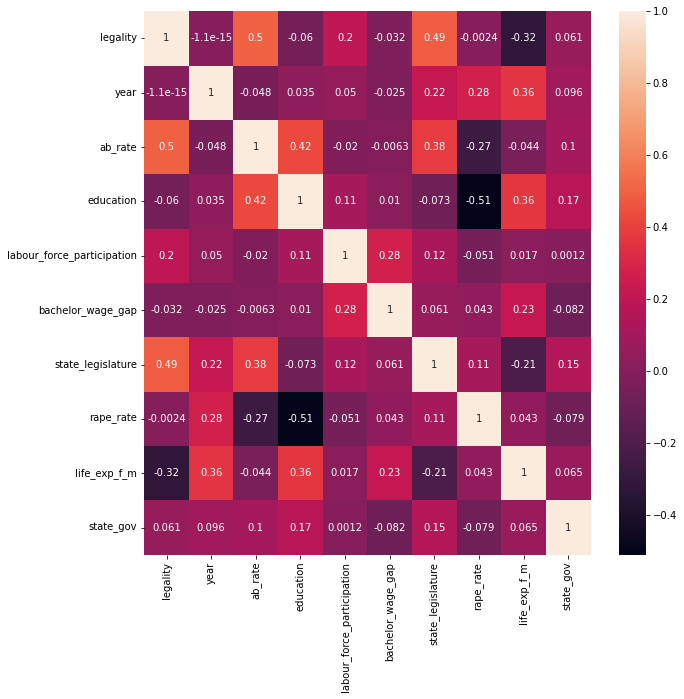

In [25]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

In [29]:
df.to_csv(r'..\all_data.csv', encoding='utf-8', index=False)